# Minor Project on Stock Price Prediction

## Introduction

Estimate the stock value using Machine Learning algorith namely LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) used in machine learning. It's adept at modeling sequences, retaining long-term dependencies, crucial for tasks like speech recognition and time series prediction due to its ability to selectively remember or forget information over time.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [4]:
# Load your stock data
data = pd.read_csv('Stock data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
# check shape
data.shape

(1009, 7)

In [6]:
# Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
#Description of the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
# Sum of null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Unique values
data.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

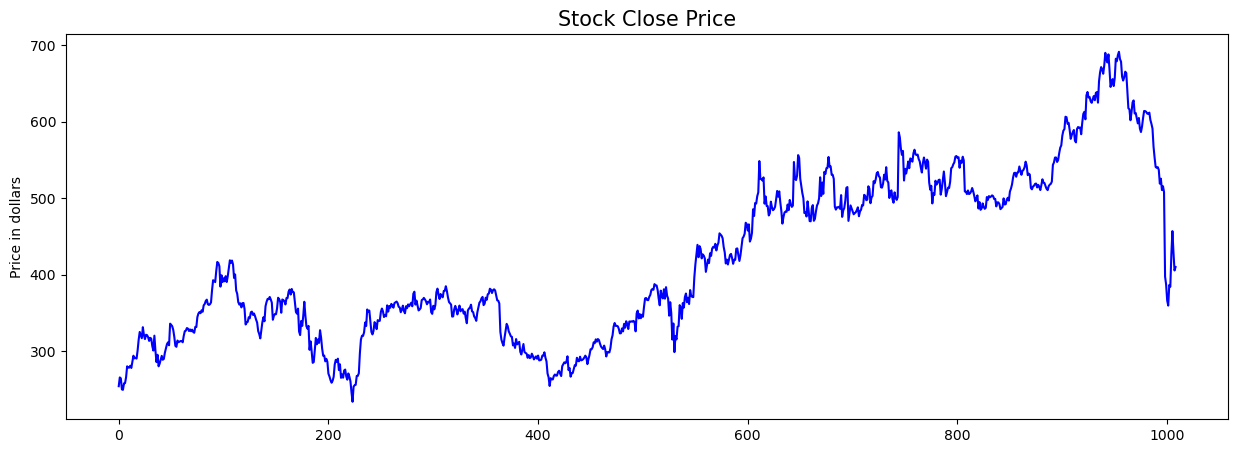

In [10]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'], color="blue")
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [11]:
# Splitting the data into training and testing sets

data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])               #70% used as a training data
data_test = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])   #30% used as a testing data

print(data_train.shape)
print(data_test.shape)

(706, 1)
(303, 1)


In [12]:
# Checking the output of training & testing sets
data_train.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [13]:
data_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [14]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [16]:
# Chekcking the shape of scaled array
data_train_array.shape

(706, 1)

In [17]:
# Preparing the training data

X_train = []
y_train = []

for i in range(100,data_train_array.shape[0]):
    X_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [18]:
# Building model of 4 LSTM network followed by Dropout layout

model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [19]:
# Checking the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
#Compiling & fitting the model 

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(X_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )


Epoch 1/50

19/19 - 7s - loss: 0.0856 - 7s/epoch - 344ms/step
Epoch 2/50
19/19 - 3s - loss: 0.0223 - 3s/epoch - 177ms/step
Epoch 3/50
19/19 - 3s - loss: 0.0158 - 3s/epoch - 165ms/step
Epoch 4/50
19/19 - 3s - loss: 0.0146 - 3s/epoch - 182ms/step
Epoch 5/50
19/19 - 3s - loss: 0.0145 - 3s/epoch - 176ms/step
Epoch 6/50
19/19 - 3s - loss: 0.0150 - 3s/epoch - 180ms/step
Epoch 7/50
19/19 - 4s - loss: 0.0141 - 4s/epoch - 186ms/step
Epoch 8/50
19/19 - 4s - loss: 0.0112 - 4s/epoch - 188ms/step
Epoch 9/50
19/19 - 4s - loss: 0.0132 - 4s/epoch - 200ms/step
Epoch 10/50
19/19 - 3s - loss: 0.0125 - 3s/epoch - 176ms/step
Epoch 11/50
19/19 - 5s - loss: 0.0114 - 5s/epoch - 276ms/step
Epoch 12/50
19/19 - 4s - loss: 0.0105 - 4s/epoch - 190ms/step
Epoch 13/50
19/19 - 4s - loss: 0.0102 - 4s/epoch - 219ms/step
Epoch 14/50
19/19 - 4s - loss: 0.0110 - 4s/epoch - 191ms/step
Epoch 15/50
19/19 - 4s - loss: 0.0108 - 4s/epoch - 208ms/step
Epoch 16/50
19/19 - 4s - loss: 0.0115 - 4s/epoch - 234ms/step
Epoch 17/50
19/

In [21]:
data_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


### For prediction, we need testing data and if we look the test data from above table. We can say that we need previous days data for prediction. Hence, for prediction append the 'data_train.tail() to data_test.head()' as mentioned below

In [22]:
data_train.tail()

,Close
701,479.100006
702,480.630005
703,481.790009
704,484.670013
705,488.239990


In [23]:
# Append testing & training data
past_100_days = data_train.tail(100)

In [24]:
final_data = past_100_days.append(data_test, ignore_index=True)

C:\Users\khanf\AppData\Local\Temp\ipykernel_13512\2758746569.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = past_100_days.append(data_test, ignore_index=True)


In [25]:
# Scaling the data

input_data = scaler.fit_transform(final_data)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [26]:
# Checking shape of the input_data
input_data.shape

(403, 1)

In [27]:
# Preparing the testing data
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
X_test,y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [28]:
# Making Predictions

y_pred = model.predict(X_test)
print(y_pred.shape)

10/10 [==============================] - 1s 36ms/step
(303, 1)


In [29]:
# Checking y_test
y_test

array([0.35217924, 0.37103526, 0.37742098, 0.39657814, 0.39459021,
       0.43639862, 0.43278411, 0.41513293, 0.41751255, 0.47013471,
       0.46073667, 0.4033254 , 0.42588629, 0.43230216, 0.49013517,
       0.48218326, 0.49739453, 0.52170251, 0.52637129, 0.50968392,
       0.50492488, 0.46621878, 0.46468256, 0.48019515, 0.51558778,
       0.49667165, 0.54528743, 0.49146052, 0.48525552, 0.42407899,
       0.44938103, 0.45392929, 0.41989216, 0.40528327, 0.44606766,
       0.42519346, 0.41651858, 0.42793452, 0.68267123, 0.66309233,
       0.61890412, 0.59363241, 0.60914481, 0.49272575, 0.53887156,
       0.52016629, 0.54019691, 0.5676676 , 0.54143199, 0.57971616,
       0.57558954, 0.56694472, 0.60053014, 0.61414507, 0.59607223,
       0.59284922, 0.59513848, 0.57724637, 0.56784832, 0.54375121,
       0.52435321, 0.56161335, 0.58348133, 0.56326999, 0.5396246 ,
       0.57513783, 0.56664358, 0.48495438, 0.45661014, 0.47197207,
       0.40251206, 0.44200125, 0.43627821, 0.49206299, 0.47688

In [30]:
# Checking y_pred
y_pred

array([[0.36483932],
       [0.36099458],
       [0.3580526 ],
       [0.35620463],
       [0.35593933],
       [0.3574148 ],
       [0.3613993 ],
       [0.36800727],
       [0.3762464 ],
       [0.38489753],
       [0.39413142],
       [0.40382165],
       [0.41221207],
       [0.41838235],
       [0.4221878 ],
       [0.4252501 ],
       [0.42873746],
       [0.43350697],
       [0.4402628 ],
       [0.44907564],
       [0.45903522],
       [0.4688539 ],
       [0.47655565],
       [0.48090863],
       [0.4819877 ],
       [0.48127544],
       [0.47975552],
       [0.47926718],
       [0.47963184],
       [0.48012054],
       [0.47876394],
       [0.47496957],
       [0.46912467],
       [0.46126902],
       [0.45146894],
       [0.4411558 ],
       [0.43130833],
       [0.4224465 ],
       [0.41515094],
       [0.41427535],
       [0.42261803],
       [0.43976694],
       [0.462941  ],
       [0.48897207],
       [0.5123201 ],
       [0.53017634],
       [0.5412571 ],
       [0.546

From above y_test & y_pred, we can't recognize how they are matching. hence, for that we need to scale the data.

In [31]:
# Scaling the data
scaler.scale_

array([0.00301214])

In [32]:
scale_factor = 1/0.00301214
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

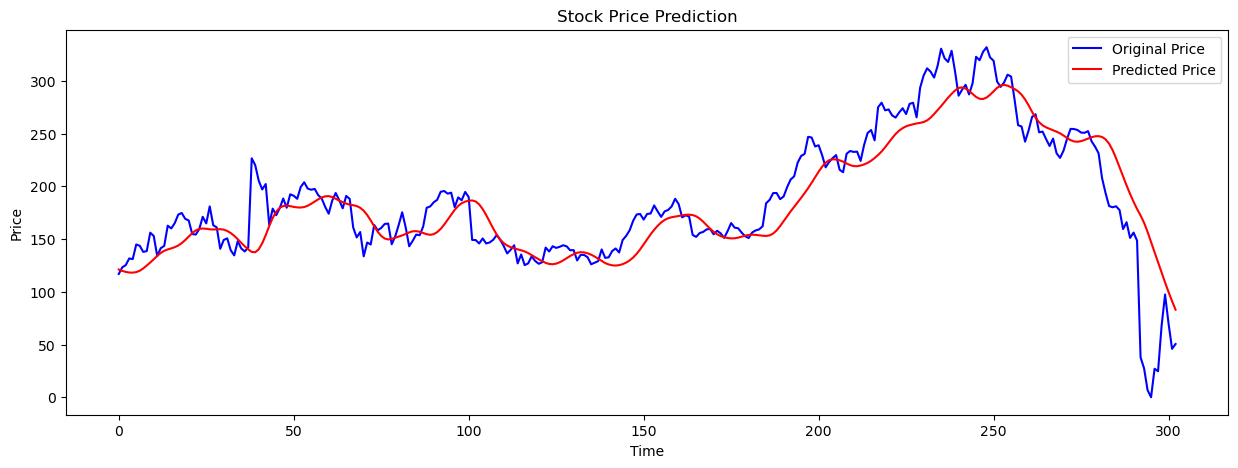

In [33]:
# Plotting graph for the result
plt.figure(figsize = (15,5))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion

Above graph shows the relation between Actual price(Blue Line) and Predicted price(Red Line) of stock for the mentioned dataset.